# MCMC demo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

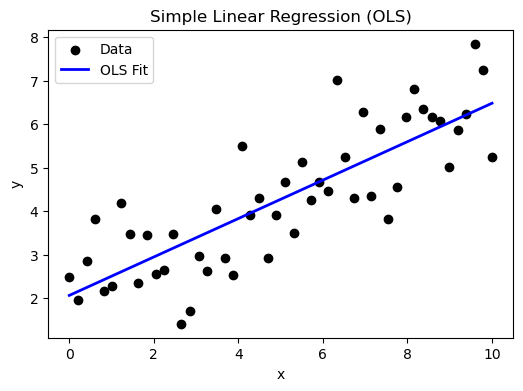

In [4]:
# Simulate some data
np.random.seed(42)
x = np.linspace(0, 10, 50)
true_beta_0 = 2
true_beta_1 = 0.5
y = true_beta_0 + true_beta_1 * x + np.random.normal(0, 1, size=x.shape)

# Simple Linear Regression using Ordinary Least Squares (OLS)
# Add a column of ones to x to represent the intercept term
X = np.vstack([np.ones_like(x), x]).T
# Calculate OLS coefficients using the normal equation: (X^T * X)^-1 * X^T * y
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ y

# Plot the data and OLS regression line
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c='black', label='Data')
plt.plot(x, beta_ols[0] + beta_ols[1] * x, color='blue', label='OLS Fit', linewidth=2)
plt.title('Simple Linear Regression (OLS)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

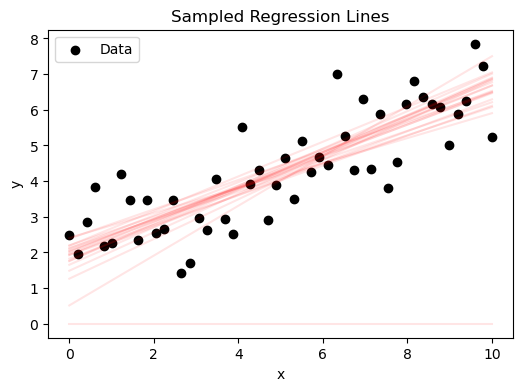

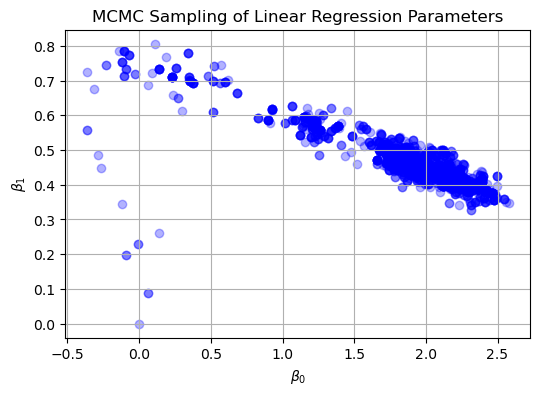

In [5]:
# Metropolis-Hastings MCMC function
def metropolis_hastings(x, y, n_iterations, init_params, proposal_width):
    beta_0_current, beta_1_current = init_params
    samples = []
    current_likelihood = likelihood(x, y, beta_0_current, beta_1_current)

    for _ in range(n_iterations):
        # Propose new values for beta_0 and beta_1
        beta_0_proposed = np.random.normal(beta_0_current, proposal_width)
        beta_1_proposed = np.random.normal(beta_1_current, proposal_width)

        proposed_likelihood = likelihood(x, y, beta_0_proposed, beta_1_proposed)

        # Acceptance probability
        acceptance_prob = min(1, proposed_likelihood / current_likelihood)

        if np.random.rand() < acceptance_prob:
            beta_0_current, beta_1_current = beta_0_proposed, beta_1_proposed
            current_likelihood = proposed_likelihood

        samples.append((beta_0_current, beta_1_current))

    return np.array(samples)

def likelihood(x, y, beta_0, beta_1, sigma=1.0):
    predicted_y = beta_0 + beta_1 * x
    return np.prod(norm.pdf(y, loc=predicted_y, scale=sigma))

# Run the MCMC
n_iterations = 2000
init_params = [0.0, 0.0]
proposal_width = 0.1
samples = metropolis_hastings(x, y, n_iterations, init_params, proposal_width)

# 1. Plot the data with sampled regression lines
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c='black', label='Data')

# Plot multiple sampled lines to show the variability
for i in range(0, len(samples), 100):  # Plot every 100th sampled line to avoid clutter
    plt.plot(x, samples[i, 0] + samples[i, 1] * x, color='red', alpha=0.1)

plt.title('Sampled Regression Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 2. Plot of sampled parameters
plt.figure(figsize=(6, 4))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, color='blue')
plt.title('MCMC Sampling of Linear Regression Parameters')
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.grid(True)
plt.show()